# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
df = pd.read_json('result.json')

df

df_json = df['messages']

df_json


df = pd.DataFrame(df_json.to_list())

df

,id,type,date,actor,actor_id,action,inviter,text,title,members,from,from_id,edited,reply_to_message_id,file,mime_type
0,1009,service,2021-08-09T05:52:05,Emiliano Muñoz,user990387724,join_group_by_link,Group,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1010,service,2021-08-09T12:03:20,Andrea Navarro (juncotic.com),user23471390,edit_group_title,NaN,,Base de datos II 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1011,service,2021-08-09T12:44:29,Gabriel Arenas 🇦🇷,user192620519,invite_members,NaN,,NaN,[Daniel Beato],NaN,NaN,NaN,NaN,NaN,NaN
3,1013,service,2021-08-09T14:17:54,Santiago Riera,user805229404,join_group_by_link,Group,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1016,service,2021-08-09T15:35:12,Lucas Galdame Villegas,user1106773171,join_group_by_link,Group,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1153,message,2021-09-19T19:54:37,NaN,NaN,NaN,NaN,buenisimo profe gracias!!,NaN,NaN,Lucas Galdame Villegas,user1106773171,NaN,NaN,NaN,NaN
89,1154,message,2021-09-19T20:27:59,NaN,NaN,NaN,NaN,Ok profe 👍🏻,NaN,NaN,Augusto,user597215828,NaN,NaN,NaN,NaN
90,1161,message,2021-09-20T18:15:27,NaN,NaN,NaN,NaN,"Buenas tardes chicos, arrancamos meet a las 1...",NaN,NaN,Gabriel Arenas 🇦🇷,user192620519,NaN,NaN,NaN,NaN
91,1162,message,2021-09-20T18:25:43,NaN,NaN,NaN,NaN,,NaN,NaN,Santiago Martinez,user807010702,NaN,NaN,(File not included. Change data exporting sett...,application/x-ipynb+json


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [3]:
print(df.edited.unique())

[nan '2021-08-09T17:43:31' '2021-09-06T18:42:40']


In [4]:
# Ver tamaño del datase
print("Dimension")
print(df.shape)
# Ver tipo de atributos
print("\n Atributos")
print(df.dtypes)

Dimension
(93, 16)

 Atributos
id                       int64
type                    object
date                    object
actor                   object
actor_id                object
action                  object
inviter                 object
text                    object
title                   object
members                 object
from                    object
from_id                 object
edited                  object
reply_to_message_id    float64
file                    object
mime_type               object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   93 non-null     int64  
 1   type                 93 non-null     object 
 2   date                 93 non-null     object 
 3   actor                26 non-null     object 
 4   actor_id             26 non-null     object 
 5   action               26 non-null     object 
 6   inviter              21 non-null     object 
 7   text                 93 non-null     object 
 8   title                1 non-null      object 
 9   members              4 non-null      object 
 10  from                 67 non-null     object 
 11  from_id              67 non-null     object 
 12  edited               2 non-null      object 
 13  reply_to_message_id  8 non-null      float64
 14  file                 1 non-null      object 
 15  mime_type            1 non-null      objec

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [6]:
faltantes = []
print(df.columns)
for columna in df.columns:
    atributo = {}
    atributo["columna"] = columna

    atributo["porcentaje"] = np.mean(df[columna].isnull())*100

    atributo["cantidad"] = np.sum(df[columna].isnull())
    faltantes.append(atributo)  

faltantes_df = pd.DataFrame(faltantes)

faltantes_df

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'inviter', 'text',
       'title', 'members', 'from', 'from_id', 'edited', 'reply_to_message_id',
       'file', 'mime_type'],
      dtype='object')


,columna,porcentaje,cantidad
0,id,0.000000,0
1,type,0.000000,0
2,date,0.000000,0
3,actor,72.043011,67
4,actor_id,72.043011,67
5,action,72.043011,67
6,inviter,77.419355,72
7,text,0.000000,0
8,title,98.924731,92
9,members,95.698925,89


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

<AxesSubplot:>

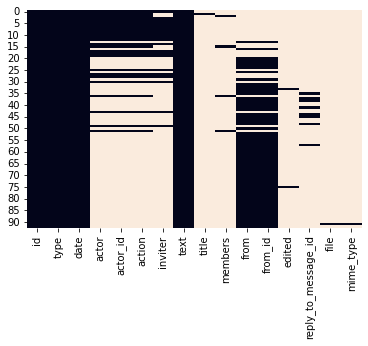

In [7]:
sns.heatmap(df.isnull(), cbar=False)

Al tener una baja cantidad de mensajes, decidimos utilizar el método de eliminar atributos en base a aquellos campos que superen el 70% de datos faltantes ya que dichos datos no serían eficaces para identificar la conversacion, los mensajes y su orden.

In [8]:
df_notna = df.copy(deep=False)
df_fl_c = faltantes_df.loc[(faltantes_df['porcentaje'] > 70)]
print(df_fl_c)

df_notna = df_notna.drop(df_fl_c['columna'], axis=1)

                columna  porcentaje  cantidad
3                 actor   72.043011        67
4              actor_id   72.043011        67
5                action   72.043011        67
6               inviter   77.419355        72
8                 title   98.924731        92
9               members   95.698925        89
12               edited   97.849462        91
13  reply_to_message_id   91.397849        85
14                 file   98.924731        92
15            mime_type   98.924731        92


In [9]:
df_notna = df_notna.sort_values(by=['id'], axis=0, ascending=False)
df_notna.head(30)

,id,type,date,text,from,from_id
92,1163,message,2021-09-20T18:56:08,Estoy actualizando mysql a la versión 8.0.26 ...,Gabriel Arenas 🇦🇷,user192620519
91,1162,message,2021-09-20T18:25:43,,Santiago Martinez,user807010702
90,1161,message,2021-09-20T18:15:27,"Buenas tardes chicos, arrancamos meet a las 1...",Gabriel Arenas 🇦🇷,user192620519
89,1154,message,2021-09-19T20:27:59,Ok profe 👍🏻,Augusto,user597215828
88,1153,message,2021-09-19T19:54:37,buenisimo profe gracias!!,Lucas Galdame Villegas,user1106773171
87,1152,message,2021-09-19T19:48:38,"Chicos, el cuestionario no lo hacemos mañana,...",Gabriel Arenas 🇦🇷,user192620519
86,1151,message,2021-09-18T18:44:15,Drive*,Augusto,user597215828
85,1150,message,2021-09-18T18:43:05,(Profe Gabriel Arenas),Augusto,user597215828
84,1149,message,2021-09-18T18:42:21,Ha subido las grabaciones de las primeras clas...,Augusto,user597215828
83,1148,message,2021-09-18T18:41:55,"Profe, buenas tardes",Augusto,user597215828


Decidimos dejar los campos de fecha y de id porque son importantes para definir el orden de las conversaciones. Además si falta un dato en uno de estos campos puede usarse el otro como referencia para ver el orden.

In [10]:
faltantes = []
for columna in df_notna.columns:
    atributo = {}
    atributo["columna"] = columna

    atributo["porcentaje"] = np.mean(df_notna[columna].isnull())*100

    atributo["cantidad"] = np.sum(df_notna[columna].isnull())
    faltantes.append(atributo)  

faltantes_df = pd.DataFrame(faltantes)

faltantes_df

,columna,porcentaje,cantidad
0,id,0.000000,0
1,type,0.000000,0
2,date,0.000000,0
3,text,0.000000,0
4,from,27.956989,26
5,from_id,27.956989,26


<AxesSubplot:>

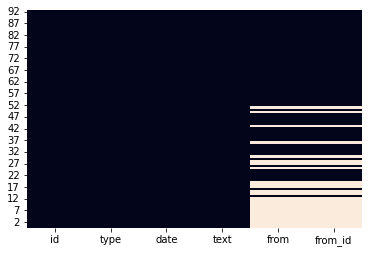

In [11]:
sns.heatmap(df_notna.isnull(), cbar=False)

Los datos faltantes de los atributos "from" y "from_id" pertenecen a mensajes de servicio, y dichos mensajes los vamos a considerar atípicos.

## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [12]:
df_notna.dtypes

id          int64
type       object
date       object
text       object
from       object
from_id    object
dtype: object

In [13]:
df_notna = df_notna.sort_values(by=['id'], axis=0, ascending=False)
df_notna

,id,type,date,text,from,from_id
92,1163,message,2021-09-20T18:56:08,Estoy actualizando mysql a la versión 8.0.26 ...,Gabriel Arenas 🇦🇷,user192620519
91,1162,message,2021-09-20T18:25:43,,Santiago Martinez,user807010702
90,1161,message,2021-09-20T18:15:27,"Buenas tardes chicos, arrancamos meet a las 1...",Gabriel Arenas 🇦🇷,user192620519
89,1154,message,2021-09-19T20:27:59,Ok profe 👍🏻,Augusto,user597215828
88,1153,message,2021-09-19T19:54:37,buenisimo profe gracias!!,Lucas Galdame Villegas,user1106773171
...,...,...,...,...,...,...
4,1016,service,2021-08-09T15:35:12,,NaN,NaN
3,1013,service,2021-08-09T14:17:54,,NaN,NaN
2,1011,service,2021-08-09T12:44:29,,NaN,NaN
1,1010,service,2021-08-09T12:03:20,,NaN,NaN


In [14]:
valor = ['service']
df_notna_atipico = df_notna[df_notna['type'].isin(valor)]
df_notna_atipico

,id,type,date,text,from,from_id
51,1110,service,2021-08-30T18:26:55,,NaN,NaN
49,1063,service,2021-08-09T18:01:27,,NaN,NaN
43,1057,service,2021-08-09T17:45:04,,NaN,NaN
36,1050,service,2021-08-09T17:38:53,,NaN,NaN
30,1044,service,2021-08-09T17:34:53,,NaN,NaN
28,1042,service,2021-08-09T17:33:28,,NaN,NaN
27,1041,service,2021-08-09T17:33:22,,NaN,NaN
25,1039,service,2021-08-09T17:32:04,,NaN,NaN
19,1032,service,2021-08-09T17:24:41,,NaN,NaN
18,1031,service,2021-08-09T16:55:56,,NaN,NaN


<AxesSubplot:>

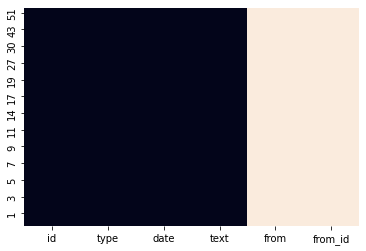

In [20]:
sns.heatmap(df_notna_atipico.isnull(), cbar=False)

In [25]:
df_notna_atipico.describe()

,id
count,26.000000
mean,1031.576923
std,21.455392
min,1009.000000
25%,1018.250000
50%,1026.000000
75%,1040.500000
max,1110.000000


- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

Estos valores atipicos no son causados por errores, son el formato de un tipo de mensaje, que en este caso son mensajes de información del sistema que no son relevantes para el análisis del chat.

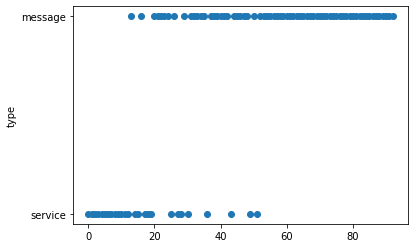

In [28]:
plt.scatter(df.index,df["type"])
plt.ylabel('type')
plt.show()

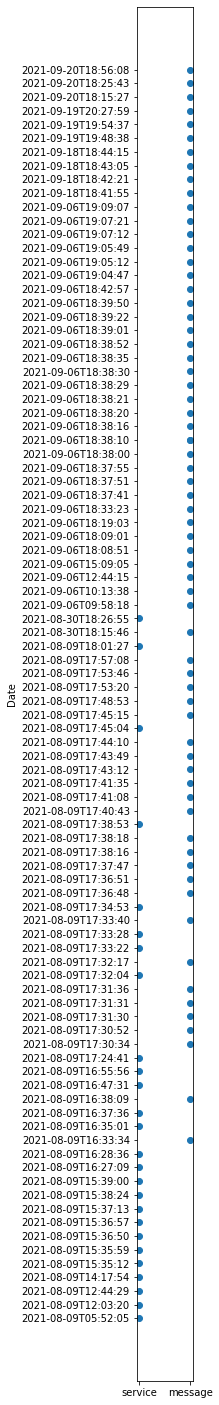

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(1, 25.27)
plt.scatter(df["type"], df["date"])
plt.ylabel('Date')
plt.show() 